In [1]:
library(tidyverse)
library(RColorBrewer)
library(sf)
library(ggthemes)
library(ggrepel)
library(stringr)

── Attaching core tidyverse packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Linking to GEOS 3.13.0, GDAL 3.8.5, PROJ 9.5.1; sf_use_s2() is TRUE



In [ ]:
options(repr.plot.width = 15, repr.plot.height = 10)


In [ ]:
drivers <- read_csv("drivers.csv", show_col_types = FALSE)
races <- read_csv("races.csv", show_col_types = FALSE)
results <- read_csv("results.csv", show_col_types = FALSE)

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details, e.g.:
  dat <- vroom(...)
  problems(dat)”


In [ ]:
driver_results <- results %>%
  left_join(races, by = "raceId") %>%
  left_join(drivers, by = "driverId") %>%
  select(
    resultId,
    raceId,
    circuitId,
    circuit_name = name, # 'name' from races table
    year,
    date,
    position,
    positionOrder,
    points,
    driverId,
    driver_code = code,
    forename,
    surname,
    driverRef,
    milliseconds,
  ) %>%
  filter(year == 2024)


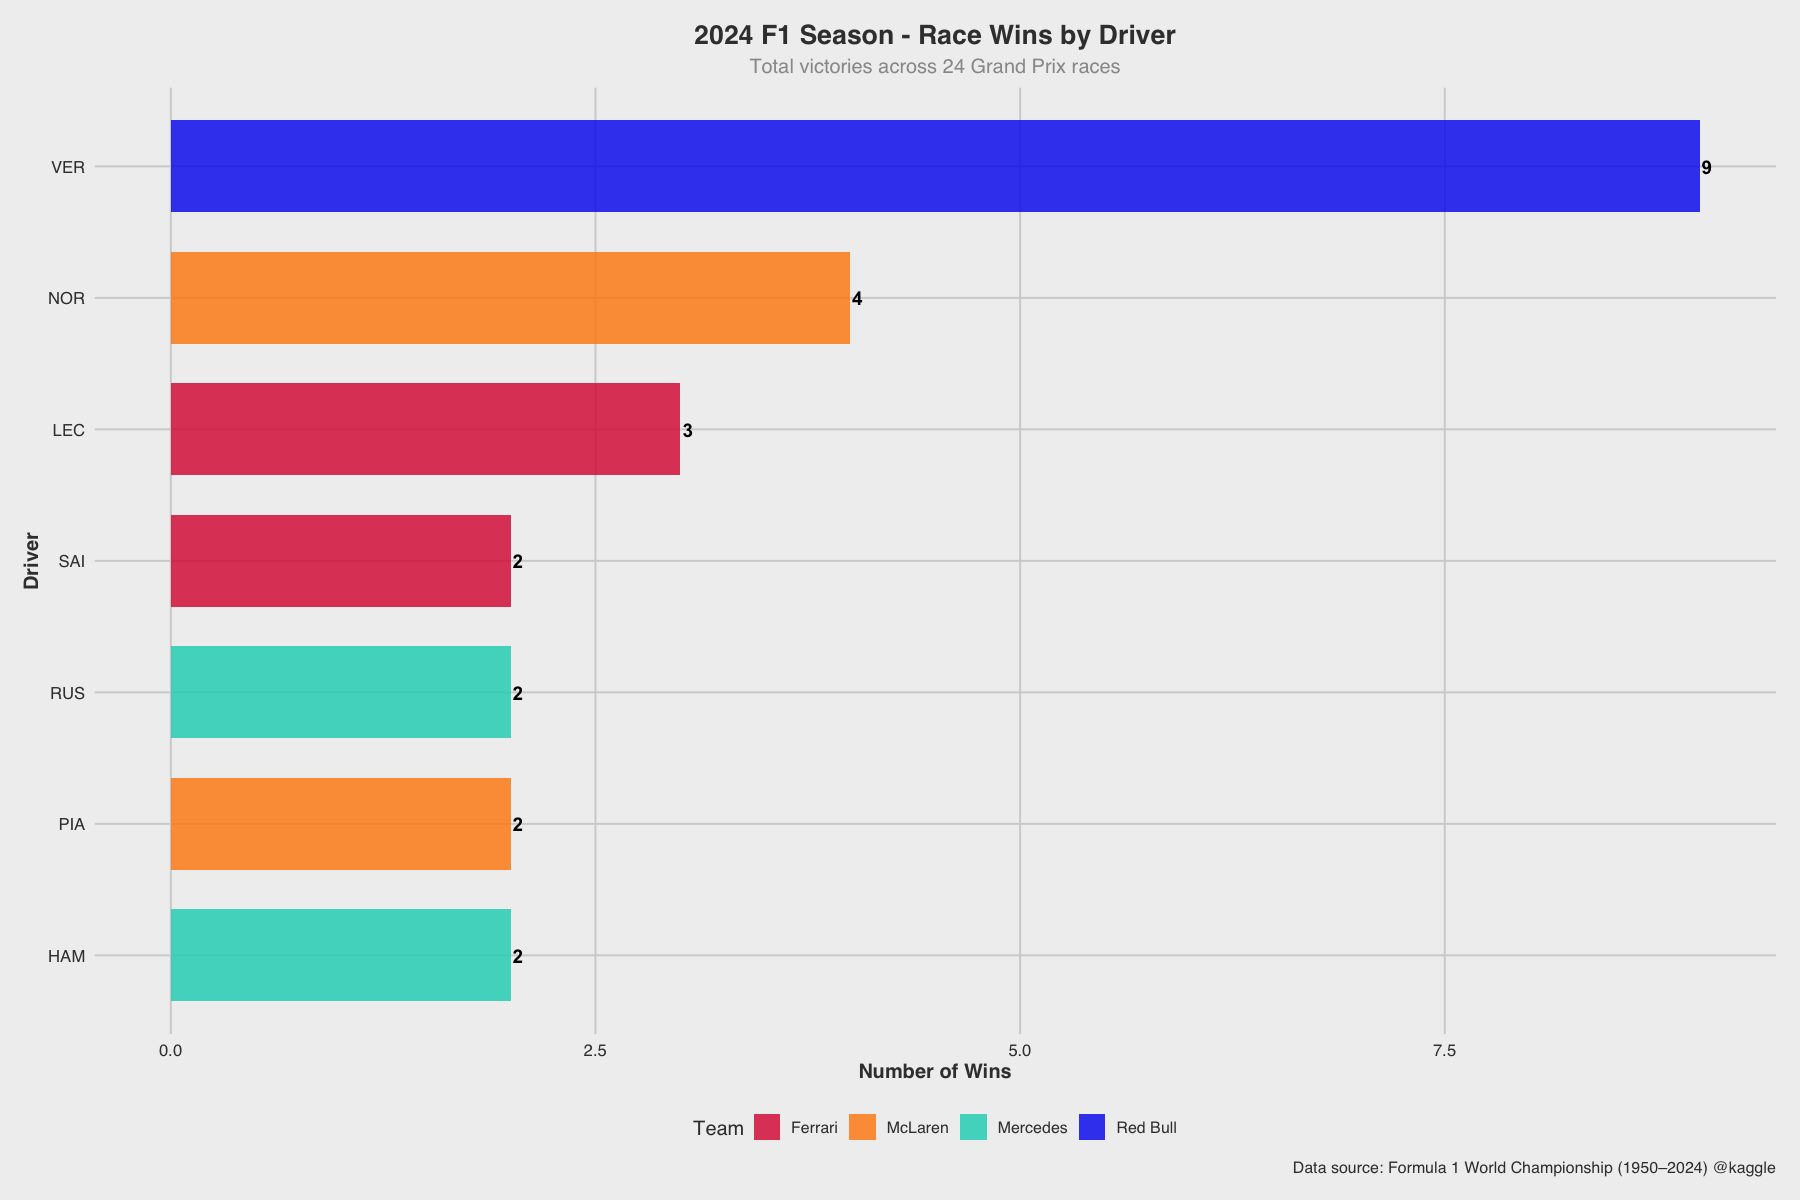

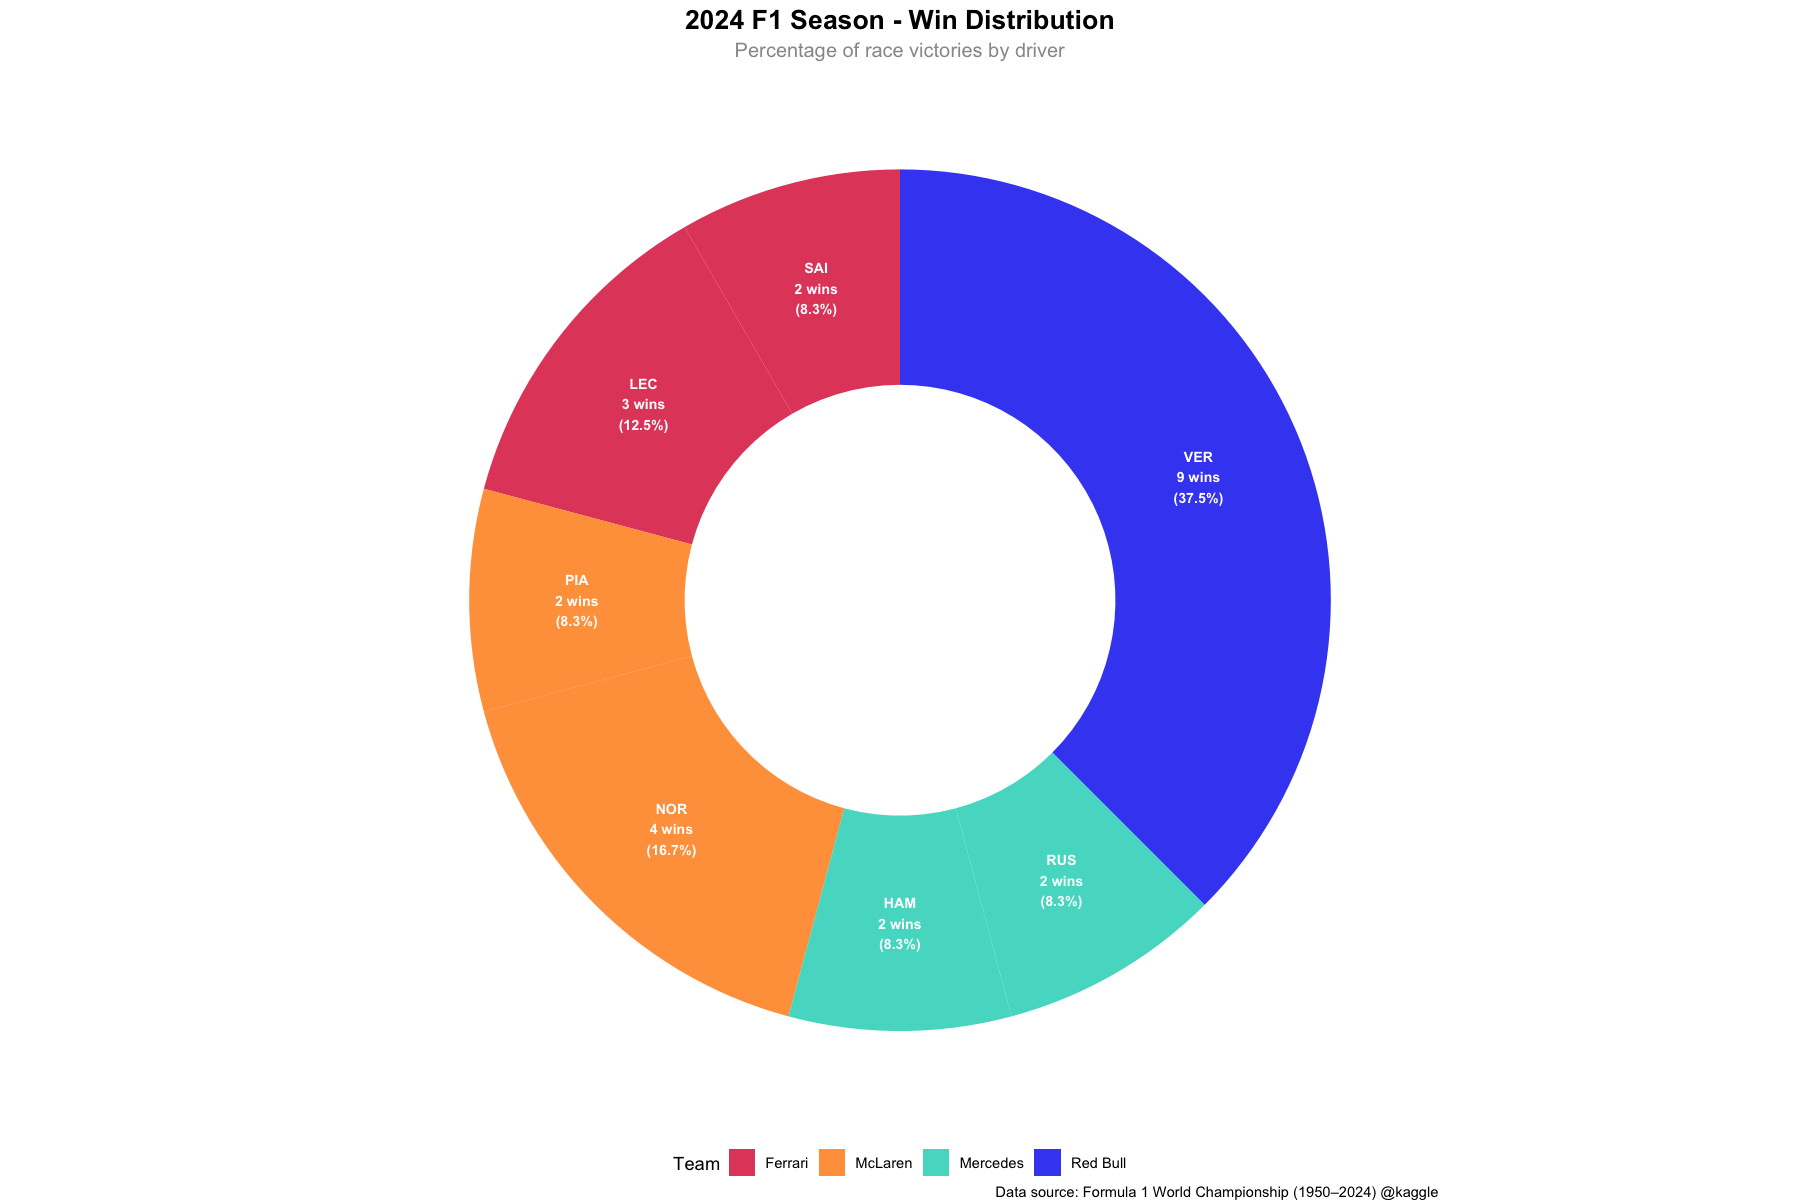

In [ ]:
# Load required libraries
library(ggplot2)
library(dplyr)
library(tidyr)
library(viridis)
library(scales)
library(lubridate)

# Complete 2024 F1 Season Race Winners Data
race_winners_2024 <- data.frame(
  race_number = 1:24,
  date = as.Date(c(
    "2024-03-02", "2024-03-09", "2024-03-24", "2024-04-07", "2024-04-21",
    "2024-05-05", "2024-05-19", "2024-05-26", "2024-06-09", "2024-06-23",
    "2024-06-30", "2024-07-07", "2024-07-21", "2024-07-28", "2024-08-25",
    "2024-09-01", "2024-09-15", "2024-09-22", "2024-10-20", "2024-10-27",
    "2024-11-03", "2024-11-23", "2024-12-01", "2024-12-08"
  )),
  grand_prix = c(
    "Bahrain", "Saudi Arabia", "Australia", "Japan", "China", "Miami",
    "Emilia Romagna", "Monaco", "Canada", "Spain", "Austria", "British",
    "Hungarian", "Belgian", "Dutch", "Italian", "Azerbaijan", "Singapore",
    "United States", "Mexico", "Brazil", "Las Vegas", "Qatar", "Abu Dhabi"
  ),
  winner = c(
    "Max Verstappen", "Max Verstappen", "Carlos Sainz", "Max Verstappen",
    "Max Verstappen", "Lando Norris", "Max Verstappen", "Charles Leclerc",
    "Max Verstappen", "Max Verstappen", "George Russell", "Lewis Hamilton",
    "Oscar Piastri", "Lewis Hamilton", "Lando Norris", "Charles Leclerc",
    "Oscar Piastri", "Lando Norris", "Charles Leclerc", "Carlos Sainz",
    "Max Verstappen", "George Russell", "Max Verstappen", "Lando Norris"
  ),
  driver_code = c(
    "VER", "VER", "SAI", "VER", "VER", "NOR", "VER", "LEC", "VER", "VER",
    "RUS", "HAM", "PIA", "HAM", "NOR", "LEC", "PIA", "NOR", "LEC", "SAI",
    "VER", "RUS", "VER", "NOR"
  ),
  team = c(
    "Red Bull", "Red Bull", "Ferrari", "Red Bull", "Red Bull", "McLaren",
    "Red Bull", "Ferrari", "Red Bull", "Red Bull", "Mercedes", "Mercedes",
    "McLaren", "Mercedes", "McLaren", "Ferrari", "McLaren", "McLaren",
    "Ferrari", "Ferrari", "Red Bull", "Mercedes", "Red Bull", "McLaren"
  )
)

# Create comprehensive championship data (estimated based on typical F1 scoring)
championship_data <- data.frame(
  driver = c(
    "Max Verstappen", "Lando Norris", "Charles Leclerc", "Oscar Piastri",
    "Carlos Sainz", "George Russell", "Lewis Hamilton", "Sergio Perez",
    "Fernando Alonso", "Nico Hulkenberg", "Yuki Tsunoda", "Pierre Gasly",
    "Lance Stroll", "Esteban Ocon", "Kevin Magnussen", "Alexander Albon",
    "Daniel Ricciardo", "Oliver Bearman", "Franco Colapinto", "Liam Lawson"
  ),
  driver_code = c(
    "VER", "NOR", "LEC", "PIA", "SAI", "RUS", "HAM", "PER", "ALO", "HUL",
    "TSU", "GAS", "STR", "OCO", "MAG", "ALB", "RIC", "BEA", "COL", "LAW"
  ),
  final_points = c(
    437, 374, 356, 292, 290, 245, 223, 152,
    70, 37, 30, 26, 17, 14, 8, 6, 12, 7, 5, 4
  ),
  team = c(
    "Red Bull", "McLaren", "Ferrari", "McLaren", "Ferrari", "Mercedes",
    "Mercedes", "Red Bull", "Aston Martin", "Haas", "RB", "Alpine",
    "Aston Martin", "Alpine", "Haas", "Williams", "RB", "Ferrari",
    "Williams", "RB"
  )
)

# Team colors for consistency
team_colors <- c(
  "Red Bull" = "#0600EF", "McLaren" = "#FF8700", "Ferrari" = "#DC143C",
  "Mercedes" = "#00D2BE", "Aston Martin" = "#006F62", "Alpine" = "#0078D4",
  "Haas" = "#FFFFFF", "Williams" = "#005AFF", "RB" = "#6692FF"
)


wins_summary <- race_winners_2024 %>%
  count(winner, driver_code, team) %>%
  arrange(desc(n))

wins_plot <- ggplot(wins_summary, aes(
  x = reorder(driver_code, n),
  y = n, fill = team
)) +
  geom_col(width = 0.7, alpha = 0.8) +
  geom_text(aes(label = n), hjust = -0.2, fontface = "bold", size = 4) +
  scale_fill_manual(values = team_colors, name = "Team") +
  coord_flip() +
  labs(
    title = "2024 F1 Season - Race Wins by Driver",
    subtitle = "Total victories across 24 Grand Prix races",
    x = "Driver",
    y = "Number of Wins",
    caption = "Data source: Formula 1 World Championship (1950–2024) @kaggle"
  ) +
  theme_fivethirtyeight() +
  theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
    plot.subtitle = element_text(size = 12, hjust = 0.5, color = "gray60"),
    legend.position = "bottom",
    panel.grid.minor = element_blank(),
    axis.text = element_text(size = 10),
    axis.title = element_text(size = 12, face = "bold")
  )

print(wins_plot)


win_distribution <- wins_summary %>%
  mutate(
    percentage = round(n / sum(n) * 100, 1),
    label = paste0(driver_code, "\n", n, " wins\n(", percentage, "%)")
  )

donut_plot <- ggplot(win_distribution, aes(x = 2, y = n, fill = team)) +
  geom_col(width = 1, alpha = 0.8) +
  geom_text(aes(label = label),
    position = position_stack(vjust = 0.5),
    fontface = "bold", size = 3, color = "white"
  ) +
  scale_fill_manual(values = team_colors, name = "Team") +
  coord_polar(theta = "y") +
  xlim(0.5, 2.5) +
  labs(
    title = "2024 F1 Season - Win Distribution",
    subtitle = "Percentage of race victories by driver",
    caption = "Data source: Formula 1 World Championship (1950–2024) @kaggle"
  ) +
  theme_void() +
  theme(
    plot.title = element_text(size = 16, face = "bold", hjust = 0.5),
    plot.subtitle = element_text(size = 12, hjust = 0.5, color = "gray60"),
    legend.position = "bottom",
    panel.border = element_blank(), # Remove panel border
    plot.background = element_blank(), # Remove plot background border
    panel.background = element_blank() # Remove panel background border
  )


print(donut_plot)


ggsave("f1_2024_wins.png", wins_plot, width = 10, height = 8, dpi = 300)
ggsave("f1_2024_win_distribution.png", donut_plot,
  width = 8, height = 8, dpi = 300
)
